## Compare the performance of the scikit and the custom decision tree classifiers

Tested on the Wine Quality dataset from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/wine+quality

## Import of the dataset

In [6]:
import pandas as pd

data = pd.read_csv('winequality-red.csv')
print("Dataset Classes:")
print(data.iloc[:,-1].unique())
data

Dataset Classes:
[5 6 7 4 8 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split the dataset into training and testing sets

In [7]:
x = data.drop(columns="quality")

y = data["quality"]

#split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Search Space for Hyperparameter Tuning

In [8]:
# params = dict()
# # max depth list from 1 to 20
# params['max_depth'] = list(range(1, 21))
# params['min_samples_split'] = list(range(2, 6))
# params['min_samples_leaf'] = list(range(1, 5))
# print(params)

import optuna
from sklearn.tree import DecisionTreeClassifier
from my_tree import CustomDecisionTreeClassifier

import optuna
from sklearn.datasets import load_iris
from sklearn.svm import SVC

clf = DecisionTreeClassifier()
param_distributions = {
    'max_depth': optuna.distributions.IntDistribution(1, 20),
    'min_samples_split': optuna.distributions.IntDistribution(2, 6),
    'min_samples_leaf': optuna.distributions.IntDistribution(1, 5)
}
optuna_search_scikit = optuna.integration.OptunaSearchCV(
    clf,
    param_distributions,
    n_trials=None,
    n_jobs=-1,
    cv=5,
    verbose = 0,
    n_trials = 100
)

clf_custom = CustomDecisionTreeClassifier()
optuna_search_custom = optuna.integration.OptunaSearchCV(
    clf_custom,
    param_distributions,
    n_trials=None,
    n_jobs=-1,
    cv=5,
    verbose = 0,
    n_trials = 100
)


# def objective_custom(trial):
#     max_depth = trial.suggest_int('max_depth', 1, 20)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 6)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
#     clf = CustomDecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
#     clf.fit(x_train, y_train)
#     return clf.score(x_test, y_test)

/var/folders/7d/2qpbdcc12_x01lh3yq_7s9j00000gn/T/ipykernel_18088/2215545301.py:22: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_scikit = optuna.integration.OptunaSearchCV(
/var/folders/7d/2qpbdcc12_x01lh3yq_7s9j00000gn/T/ipykernel_18088/2215545301.py:32: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_custom = optuna.integration.OptunaSearchCV(


## K-Fold Cross Validation

In [9]:
# from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

## Initialize Optimizer

In [10]:
# from sklearn.model_selection import GridSearchCV

# clf = DecisionTreeClassifier(random_state=42)

# search = GridSearchCV(estimator=clf, param_grid=params, cv=cv, scoring ='accuracy', verbose=0)

# from my_tree import CustomDecisionTreeClassifier
# from fast_parameter_search import MyGridSearchCV

# my_clf = CustomDecisionTreeClassifier()

# my_search = MyGridSearchCV(my_clf, params, cv=cv)


## Results

In [11]:
# #Scikit Learn Decision Tree
# search.fit(x_train, y_train)
# print("Scikit Learn Decision Tree")
# print("Best score", search.best_score_)
# print("Best parameters", search.best_params_)

# # My Decision Tree
# my_search.fit(x_train, y_train)
# print("Custom Decision Tree")
# print("Best score", my_search.best_score)
# print("Best parameters", my_search.best_params)

optuna_search_scikit.fit(x_train, y_train)
print("Scikit Learn Decision Tree")
print("Best score", optuna_search.best_score_)
print("Best parameters", optuna_search.best_params_)

optuna_search_custom.fit(x_train, y_train)
print("Custom Decision Tree")
print("Best score", optuna_search_custom.best_score_)
print("Best parameters", optuna_search_custom.best_params_)

[I 2024-06-13 14:56:06,214] A new study created in memory with name: no-name-e793f9cd-9b56-4f73-b891-d3a4cf1adf7f
[I 2024-06-13 14:56:06,310] Trial 0 finished with value: 0.563734681372549 and parameters: {'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.563734681372549.
[I 2024-06-13 14:56:06,317] Trial 2 finished with value: 0.5528247549019608 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.563734681372549.
[I 2024-06-13 14:56:06,320] Trial 4 finished with value: 0.569203431372549 and parameters: {'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.569203431372549.
[I 2024-06-13 14:56:06,322] Trial 3 finished with value: 0.5700337009803922 and parameters: {'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.5700337009803922.
[I 2024-06-13 14:56:06,323] Trial 5 finished with value: 0.5793872549

## Test the Models

## Scikit Decision Tree Classifier

Test Accuracy 0.5375
Train Accuracy 0.7107114933541829
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  1 95 32  2  0]
 [ 0  0 57 62 13  0]
 [ 1  0  5 21 15  0]
 [ 0  0  0  4  1  0]]


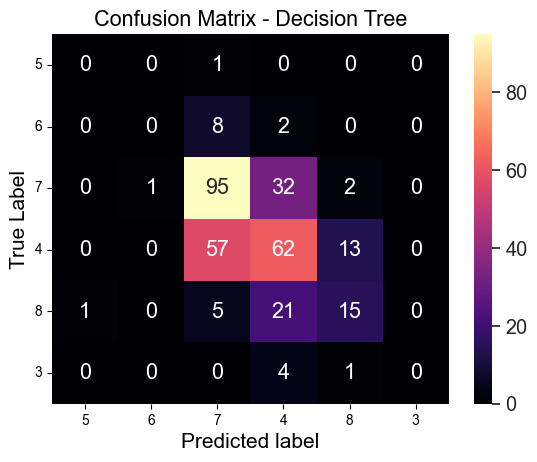

<Figure size 1000x700 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get the best estimator
# best = search.best_estimator_
best = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=42)
# Fit the model
best.fit(x_train, y_train)
# Predict the test data
y_pred = best.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy)
train_accuracy = accuracy_score(y_train, best.predict(x_train))
print("Train Accuracy", train_accuracy)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

## Custom Decision Tree Classifier

Test Accuracy 0.5375
Train Accuracy 0.7107114933541829


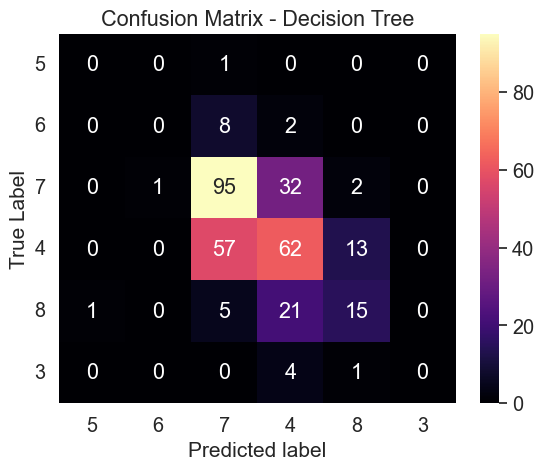

<Figure size 1000x700 with 0 Axes>

In [ ]:
# Get the best estimator
# my_best_estimator = my_search.best_estimator
my_best_estimator = CustomDecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2)
# Fit the model
my_best_estimator.fit(x_train, y_train)
# Predict the test data
y_pred = my_best_estimator.predict(x_test)
# Get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy", accuracy)
train_accuracy = accuracy_score(y_train, my_best_estimator.predict(x_train))
print("Train Accuracy", train_accuracy)
# Get the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(confusion)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
labels = y.unique()
ax.set_xticklabels(list(labels))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()